# Flights Data Analysis

The dataset contains the monthly number of airline passengers from 1949 to 1960.

My goal is to analyze trends, seasonality patterns, and passenger growth over time.

## The dataset contains the following columns:

| Column Name    | Description                                            |
| -------------- | ------------------------------------------------------ |
| **year**       | The year of observation (from 1949 to 1960).           |
| **month**      | The month of the year (January to December).           |
| **passengers** | The total number of airline passengers (in thousands). |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Load Dataset

In [ ]:

data = sns.load_dataset('flights')
data.head()


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Data Understanding

In [3]:
data.shape


(144, 3)

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [5]:
data.describe()


,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [6]:
data.isnull().sum()   

year          0
month         0
passengers    0
dtype: int64

**Observations:**

- The dataset contains 144 rows (12 months × 12 years).

- No missing values.

- Data types are correct.

### **Exploratory Data Analysis (EDA)**

#### Passenger Growth Over Years

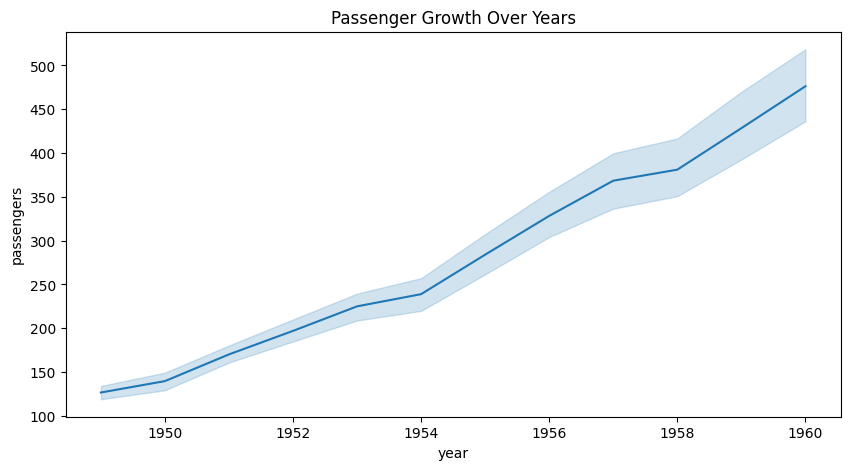

In [7]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='year', y='passengers')
plt.title("Passenger Growth Over Years")
plt.show()


> Passenger numbers show a clear upward trend over time.

#### Monthly Seasonality Pattern

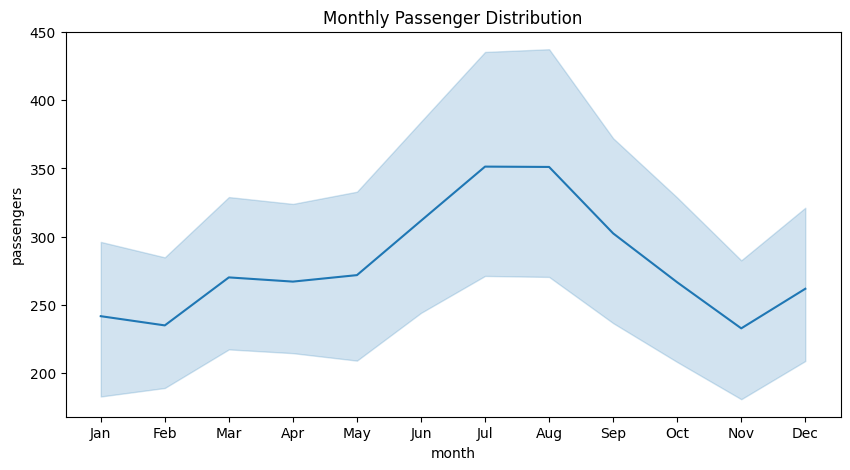

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='month', y='passengers')
plt.title("Monthly Passenger Distribution")
plt.show()


>Some months consistently show higher passenger counts, indicating seasonality.

#### Heatmap Visualization (Year vs Month)

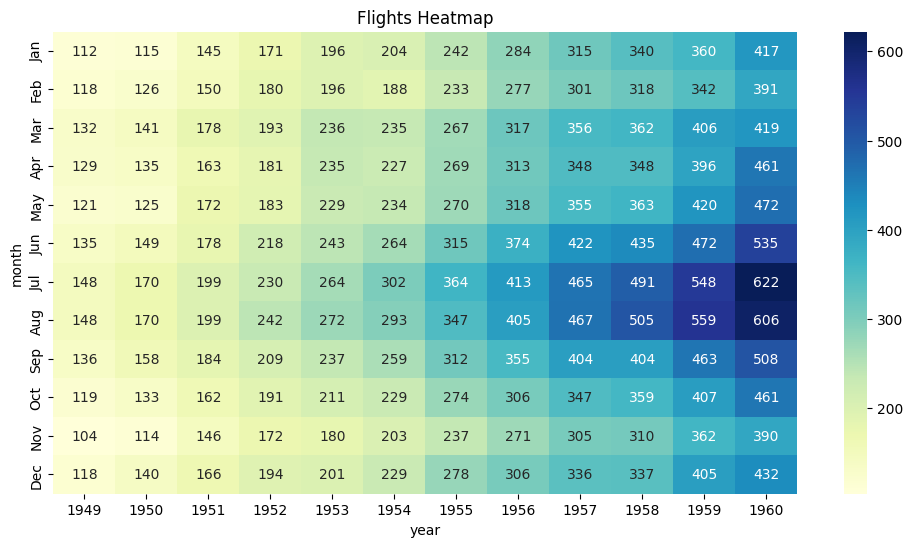

In [11]:
pivot_table = data.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True,fmt="d", cmap="YlGnBu")
plt.title("Flights Heatmap")
plt.show()


> Clear seasonal pattern.

> Increasing intensity over years.

> Strong summer peaks.

### Statistical Insights

In [12]:
data['passengers'].max()


np.int64(622)

In [13]:
data['passengers'].min()


np.int64(104)

In [14]:
data['passengers'].mean()


np.float64(280.2986111111111)

### Feature Engineering

#### Create a Full Date Column

In [15]:
data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))
data.head()


C:\Users\Basmala\AppData\Local\Temp\ipykernel_9108\2003397695.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['year'].astype(str) + '-' + data['month'].astype(str))


,year,month,passengers,date
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


#### Extract Quarter

In [16]:
data['quarter'] = data['date'].dt.quarter
data.head()

,year,month,passengers,date,quarter
0,1949,Jan,112,1949-01-01,1
1,1949,Feb,118,1949-02-01,1
2,1949,Mar,132,1949-03-01,1
3,1949,Apr,129,1949-04-01,2
4,1949,May,121,1949-05-01,2


#### Create Growth Feature (Yearly Change)

In [18]:
data = data.sort_values(['month', 'year'])


In [19]:
data['yearly_growth'] = data.groupby('month')['passengers'].diff()
data.head()

C:\Users\Basmala\AppData\Local\Temp\ipykernel_9108\1056087898.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['yearly_growth'] = data.groupby('month')['passengers'].diff()


,year,month,passengers,date,quarter,yearly_growth
0,1949,Jan,112,1949-01-01,1,NaN
12,1950,Jan,115,1950-01-01,1,3.0
24,1951,Jan,145,1951-01-01,1,30.0
36,1952,Jan,171,1952-01-01,1,26.0
48,1953,Jan,196,1953-01-01,1,25.0


In [20]:
data['yearly_growth'] = data['yearly_growth'].fillna(0)
data.head()

,year,month,passengers,date,quarter,yearly_growth
0,1949,Jan,112,1949-01-01,1,0.0
12,1950,Jan,115,1950-01-01,1,3.0
24,1951,Jan,145,1951-01-01,1,30.0
36,1952,Jan,171,1952-01-01,1,26.0
48,1953,Jan,196,1953-01-01,1,25.0


In [21]:
data['pct_growth'] = data.groupby('month')['passengers'].pct_change() * 100
data['pct_growth'] = data['pct_growth'].fillna(0)
data.head()

C:\Users\Basmala\AppData\Local\Temp\ipykernel_9108\4277914664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data['pct_growth'] = data.groupby('month')['passengers'].pct_change() * 100


,year,month,passengers,date,quarter,yearly_growth,pct_growth
0,1949,Jan,112,1949-01-01,1,0.0,0.000000
12,1950,Jan,115,1950-01-01,1,3.0,2.678571
24,1951,Jan,145,1951-01-01,1,30.0,26.086957
36,1952,Jan,171,1952-01-01,1,26.0,17.931034
48,1953,Jan,196,1953-01-01,1,25.0,14.619883


#### Boxplot by Month (Seasonality Detection)

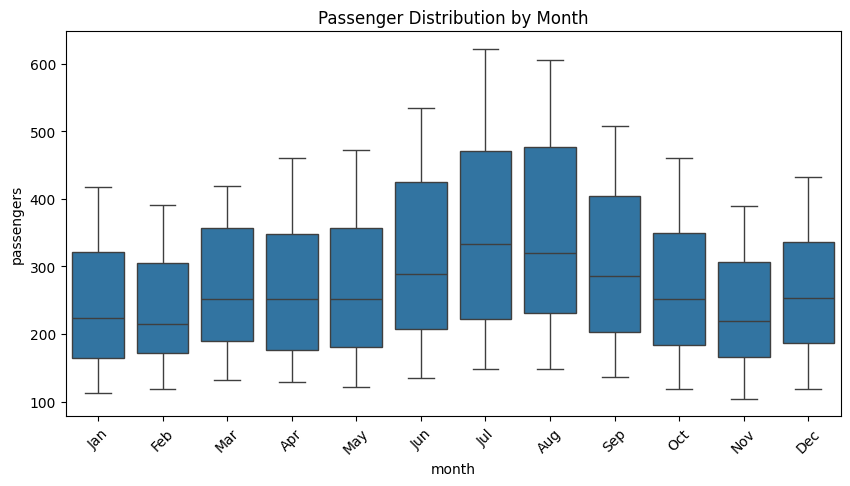

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x='month', y='passengers')
plt.xticks(rotation=45)
plt.title("Passenger Distribution by Month")
plt.show()


#### Barplot by Quarter

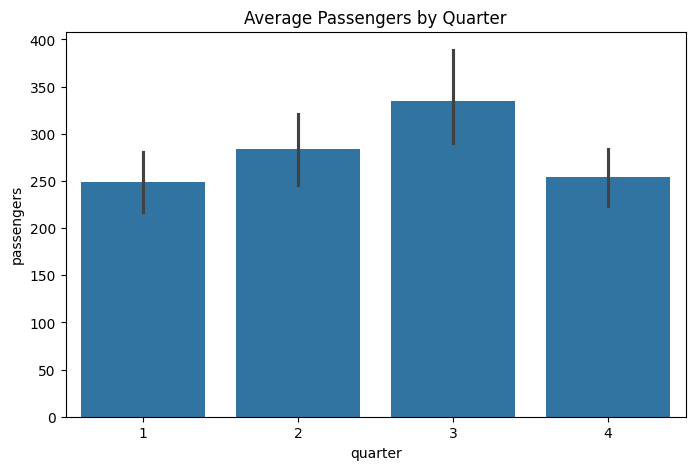

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=data, x='quarter', y='passengers')
plt.title("Average Passengers by Quarter")
plt.show()


#### Rolling Average (Trend Smoothing)

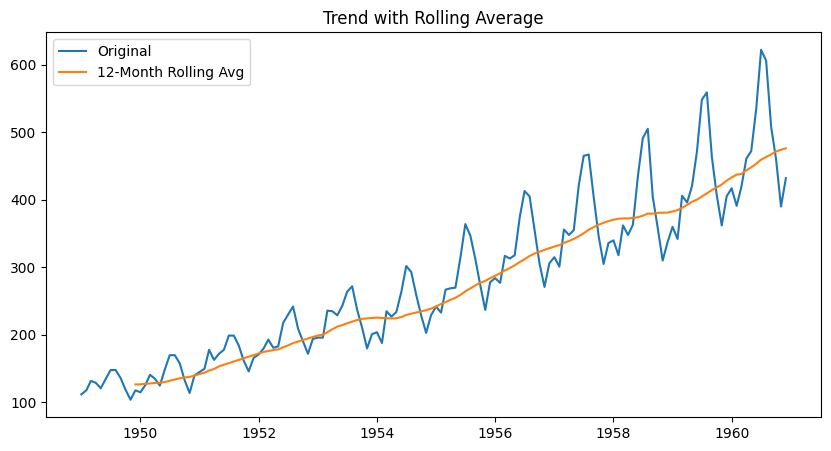

In [24]:
data = data.sort_values('date')
data['rolling_avg'] = data['passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
plt.plot(data['date'], data['passengers'], label='Original')
plt.plot(data['date'], data['rolling_avg'], label='12-Month Rolling Avg')
plt.legend()
plt.title("Trend with Rolling Average")
plt.show()


#### Growth Heatmap

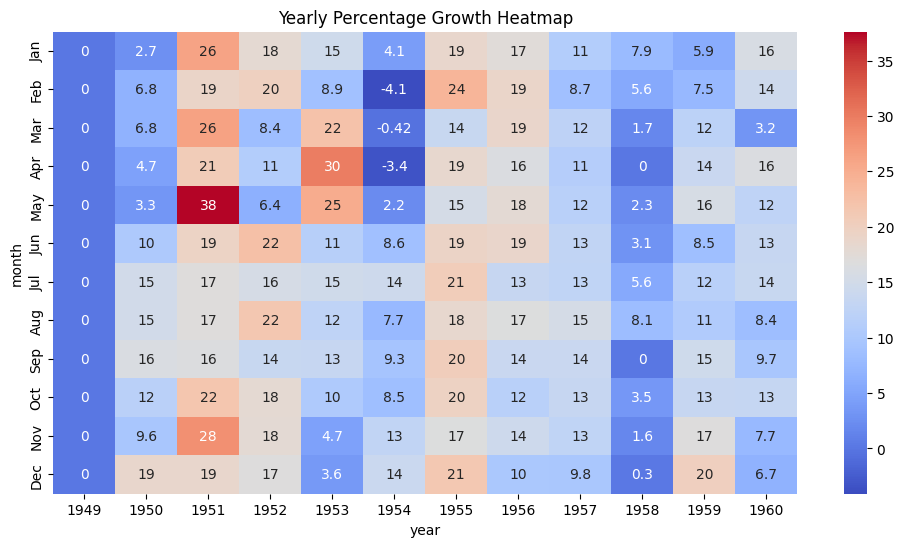

In [25]:
growth_pivot = data.pivot(index='month', columns='year', values='pct_growth')

plt.figure(figsize=(12,6))
sns.heatmap(growth_pivot, annot=True, cmap="coolwarm")
plt.title("Yearly Percentage Growth Heatmap")
plt.show()


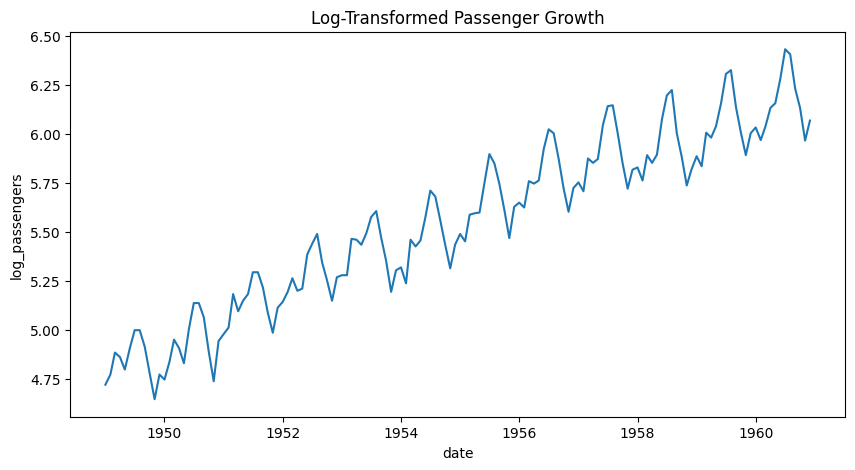

In [27]:
data['log_passengers'] = np.log(data['passengers'])
plt.figure(figsize=(10,5))
sns.lineplot(data=data, x='date', y='log_passengers')   
plt.title("Log-Transformed Passenger Growth")
plt.show()


### Key  Insights

- Passenger numbers increased significantly between 1949 and 1960.

- Strong seasonal peaks occur during summer months.

- Growth appears exponential rather than linear.

- Airlines would need capacity planning for peak months.